In [1]:
import matplotlib
#matplotlib.use('Agg')  #this should be uncommented if you are running this in the background on a server
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import os
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import pandas as pd
import datetime as dt
from scipy.optimize import curve_fit
import plotly.express as px
import scipy as sp
import pylab

sns.set(style="ticks", context="paper")
plt.style.use("dark_background")


In [2]:
yyyymmdd = '20230209'

ds = xr.open_mfdataset('/data/keeling/a/mp46/Research/Processed_Data/'+yyyymmdd+'_BUFtest.nc')

print(ds)


<xarray.Dataset>
Dimensions:                      (diameter: 32, time: 1148, velocity: 32)
Coordinates:
  * time                         (time) datetime64[ns] 2023-02-09 ... 2023-02...
  * diameter                     (diameter) float64 0.062 0.187 ... 21.5 24.5
  * velocity                     (velocity) float64 0.05 0.15 0.25 ... 17.6 20.8
Data variables: (12/25)
    avg_rainrate                 (time) float64 dask.array<chunksize=(1148,), meta=np.ndarray>
    avg_dbz                      (time) float64 dask.array<chunksize=(1148,), meta=np.ndarray>
    mean_diameter                (time) float64 dask.array<chunksize=(1148,), meta=np.ndarray>
    calc_dBZ                     (time) float64 dask.array<chunksize=(1148,), meta=np.ndarray>
    original_dsd                 (time, diameter) float64 dask.array<chunksize=(1148, 32), meta=np.ndarray>
    dsd                          (time, diameter) float64 dask.array<chunksize=(1148, 32), meta=np.ndarray>
    ...                           ..

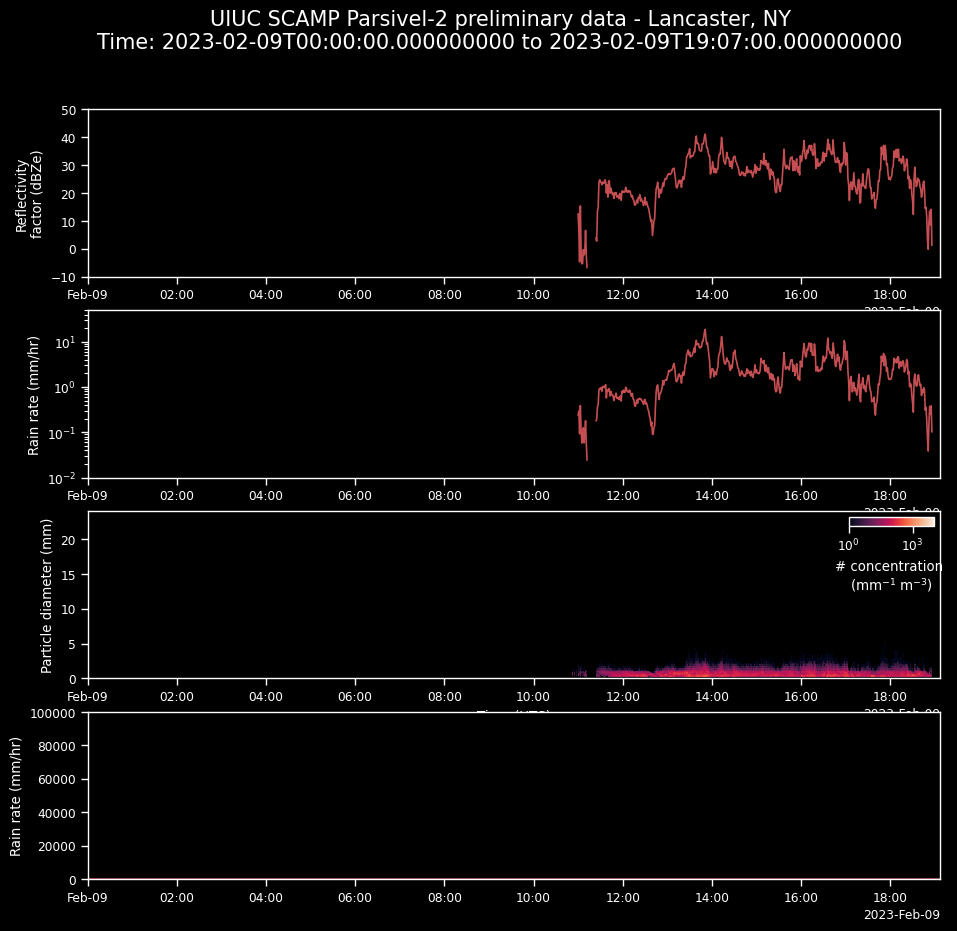

In [3]:
#masking missing values
ds['avg_dbz'][ds['avg_dbz'] < -9.9] = np.nan

fig,ax = plt.subplots(nrows = 4,figsize=(11,10))
ax[0].plot(pd.to_datetime(ds.time),ds.avg_dbz,'r')
ax[0].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax[1].xaxis.get_major_locator()))
ax[0].set_ylabel('Reflectivity\nfactor (dBZe)', fontsize='medium')

ax[0].set_ylim(-10,50)
ax[0].set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))
ds['avg_rainrate'][ds['avg_rainrate'] < .0001] = np.nan
ax[1].plot(pd.to_datetime(ds.time),ds.avg_rainrate,'r')
ax[1].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax[1].xaxis.get_major_locator()))
ax[1].set_ylabel('Rain rate (mm/hr)', fontsize='medium')
ax[1].set_yscale("log")
ax[1].set_ylim(.01,50)
ax[1].set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

from matplotlib.colors import LogNorm
cb=ax[2].pcolormesh(pd.to_datetime(ds.time),ds.diameter,ds.dsd.T,
              norm=LogNorm(vmin=1e-0, vmax=10000))
ax[2].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax[2].xaxis.get_major_locator()))
cbaxes = inset_axes(ax[2], width="10%", height="5%", loc='upper right') 
plt.colorbar(cb,cax=cbaxes,label='# concentration \n(mm$^{-1}$ m$^{-3}$)',orientation='horizontal')
ax[2].set_ylabel('Particle diameter (mm)', fontsize='medium')
ax[2].set_xlabel('Time (UTC)', fontsize='medium')
ax[2].set_ylim([0,24])
#ax[2].set_facecolor("white")
ax[2].set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

ax[3].plot(pd.to_datetime(ds.time),ds.Heymsfield_mass_warm_total,'r')
ax[3].xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax[3].xaxis.get_major_locator()))
ax[3].set_ylabel('Rain rate (mm/hr)', fontsize='medium')
#ax[3].set_yscale("log")
ax[3].set_ylim(-100,100000)
ax[3].set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

fig.suptitle('UIUC SCAMP Parsivel-2 preliminary data - Lancaster, NY\nTime: '+str(ds.time.values[0])+' to '+str(ds.time.values[-1]),fontsize=15);

savedimage = '/data/keeling/a/mp46/Research/Saved_Images/Parsivel_BUF_'+yyyymmdd+'_snow.png'
plt.savefig(savedimage,dpi=150)

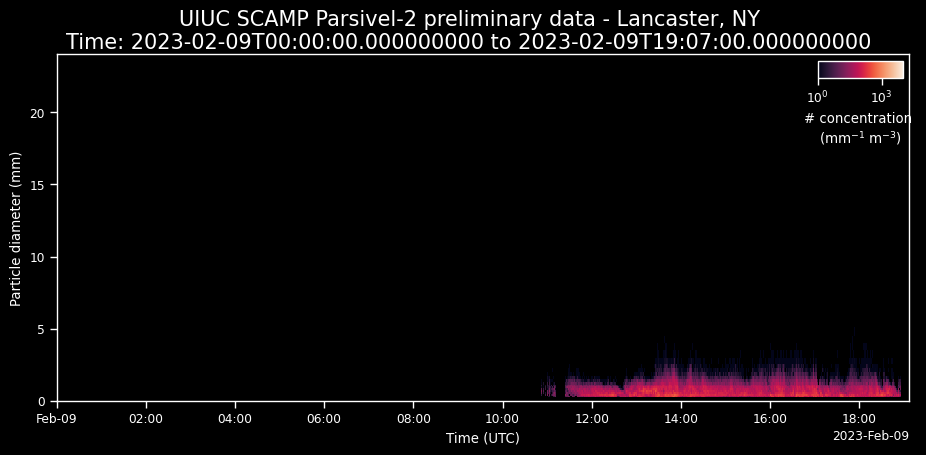

In [4]:
fig,ax = plt.subplots(nrows = 1,figsize=(11,4.5))
from matplotlib.colors import LogNorm
cb=ax.pcolormesh(pd.to_datetime(ds.time),ds.diameter,ds.dsd.T,
              norm=LogNorm(vmin=1e-0, vmax=10000))
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
cbaxes = inset_axes(ax, width="10%", height="5%", loc='upper right') 
plt.colorbar(cb,cax=cbaxes,label='# concentration \n(mm$^{-1}$ m$^{-3}$)',orientation='horizontal')
ax.set_ylabel('Particle diameter (mm)', fontsize='medium')
ax.set_xlabel('Time (UTC)', fontsize='medium')
ax.set_ylim([0,24])
#ax[2].set_facecolor("white")
ax.set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

fig.suptitle('UIUC SCAMP Parsivel-2 preliminary data - Lancaster, NY\nTime: '+str(ds.time.values[0])+' to '+str(ds.time.values[-1]),fontsize=15);


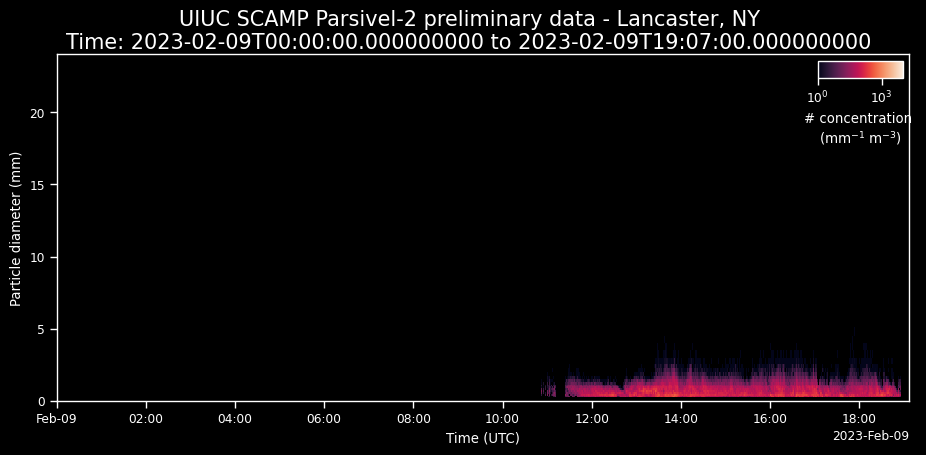

In [5]:
fig,ax = plt.subplots(nrows = 1,figsize=(11,4.5))
from matplotlib.colors import LogNorm
cb=ax.pcolormesh(pd.to_datetime(ds.time),ds.diameter,ds.dsd.T,
              norm=LogNorm(vmin=1e-0, vmax=10000))
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
cbaxes = inset_axes(ax, width="10%", height="5%", loc='upper right') 
plt.colorbar(cb,cax=cbaxes,label='# concentration \n(mm$^{-1}$ m$^{-3}$)',orientation='horizontal')
ax.set_ylabel('Particle diameter (mm)', fontsize='medium')
ax.set_xlabel('Time (UTC)', fontsize='medium')
ax.set_ylim([0,24])
#ax[2].set_facecolor("white")
ax.set_xlim(pd.to_datetime(ds.time.values[0]),pd.to_datetime(ds.time.values[-1]))

fig.suptitle('UIUC SCAMP Parsivel-2 preliminary data - Lancaster, NY\nTime: '+str(ds.time.values[0])+' to '+str(ds.time.values[-1]),fontsize=15);



In [6]:
summed_spectrum = ds.spectrum.sum(axis=0)

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

import math
from tqdm import tqdm
separate_diameters = []
separate_velocities = []
diameters = ds.diameter.values.tolist()
print(type(diameters))

for i in tqdm(range(len(summed_spectrum))):
    for j in range(len(summed_spectrum)):
        niftycount = math.floor(summed_spectrum[j,i].values)
        if niftycount > 0:
            separate_diameters.extend([float(ds.diameter[i])]*niftycount)
            separate_velocities.extend([float(ds.velocity[j])]*niftycount)

separate_diameters = np.array(separate_diameters)/10
# Fit the dummy power-law data
pars, cov = curve_fit(f=power_law, xdata=separate_diameters, ydata=separate_velocities, p0=[0.006, 0.05], bounds=(-np.inf, np.inf))
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = ds.velocity - power_law(ds.diameter, *pars)


<class 'list'>


100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


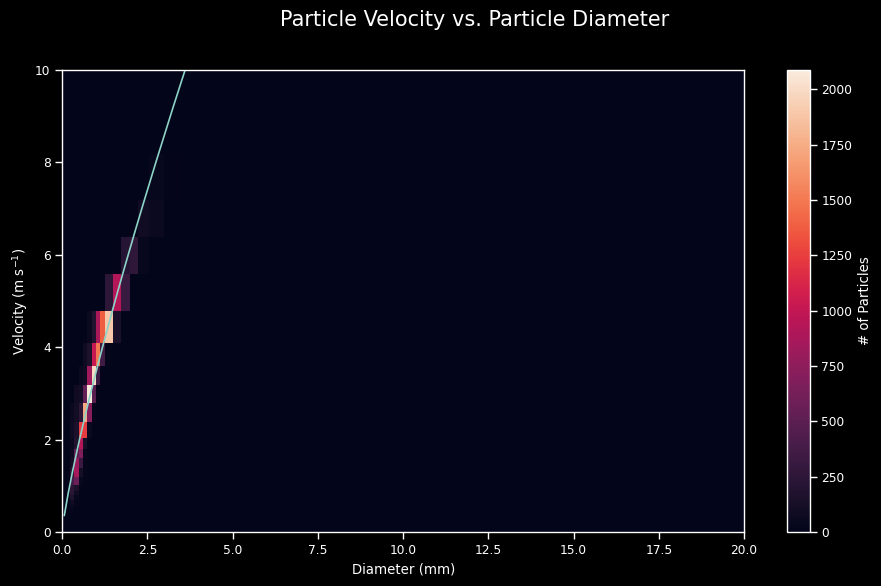

In [7]:
fig, ax = plt.subplots()
fig.suptitle('Particle Velocity vs. Particle Diameter', fontsize=15)
fig.set_size_inches(11,6) #x,y size, default is 8,6
plt.pcolor(ds.diameter,ds.velocity,summed_spectrum,vmin = 0, vmax=np.max(np.array(summed_spectrum)))
plt.plot(ds.diameter,pars[0]*np.power(ds.diameter/10, pars[1]))
             
plt.xlabel('Diameter (mm)')
plt.ylabel('Velocity (m s$^{-1}$)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('# of Particles')
ax.set_ylim(0,10)
ax.set_xlim(0,20)
ax.set_facecolor("white")

plt.savefig('/data/keeling/a/mp46/Research/Saved_Images/Gauge_Parsivel_Rain_Cases/Parsivel_BUF'+yyyymmdd+'.png')

plt.show()
#plt.savefig('/data/keeling/a/mp46/Research/Saved_Images/Gauge_Parsivel_Rain_Cases/Parsivel_BUF'+yyyymmdd+'.png')
        

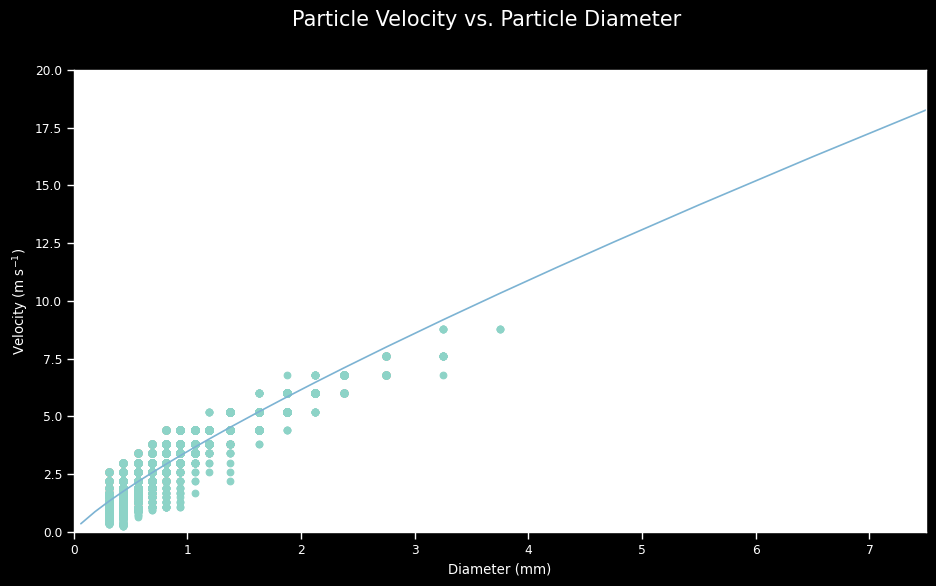

In [8]:
fig, ax = plt.subplots()
fig.suptitle('Particle Velocity vs. Particle Diameter', fontsize=15)
fig.set_size_inches(11,6) #x,y size, default is 8,6
plt.scatter(np.array(separate_diameters*10),separate_velocities)#vmax=np.max(dsd_arr))
plt.plot(ds.diameter,(pars[0])*np.power(ds.diameter/10, pars[1]), color = '#7cb3d3')
             
plt.xlabel('Diameter (mm)')
plt.ylabel('Velocity (m s$^{-1}$)')
#cbar = plt.colorbar()
#bar.ax.set_ylabel('# of Particles')
ax.set_ylim(0,20)
ax.set_xlim(0,7.5)
ax.set_facecolor("white")

plt.savefig('/data/keeling/a/mp46/Research/Saved_Images/Gauge_Parsivel_Rain_Cases/Parsivel_Scatter_BUF'+yyyymmdd+'.png')

plt.show()

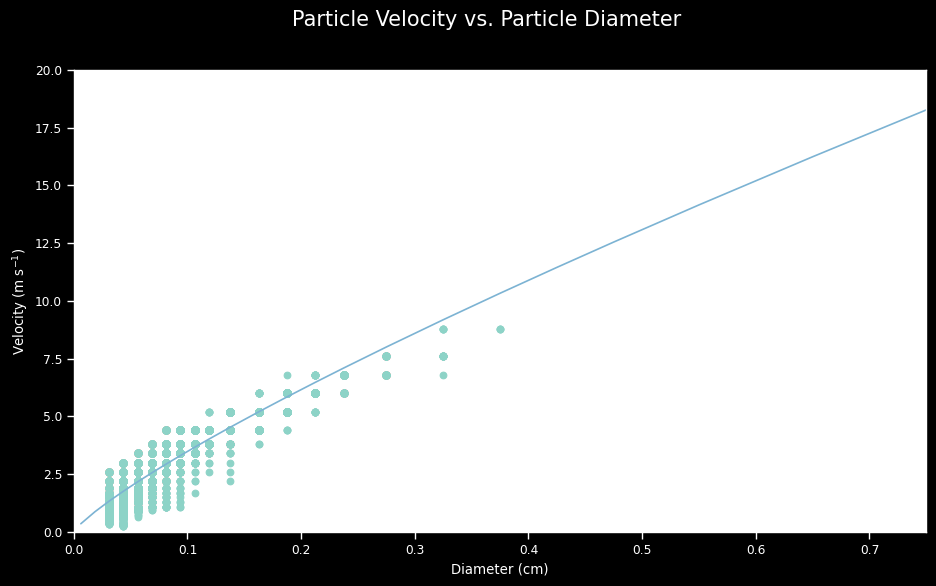

In [9]:
fig, ax = plt.subplots()
fig.suptitle('Particle Velocity vs. Particle Diameter', fontsize=15)
fig.set_size_inches(11,6) #x,y size, default is 8,6
plt.scatter(separate_diameters,separate_velocities)#vmax=np.max(dsd_arr))
plt.plot(ds.diameter/10,pars[0]*np.power(ds.diameter/10, pars[1]), color = '#7cb3d3')
             
plt.xlabel('Diameter (cm)')
plt.ylabel('Velocity (m s$^{-1}$)')
#cbar = plt.colorbar()
#bar.ax.set_ylabel('# of Particles')
ax.set_ylim(0,20)
ax.set_xlim(0,.75)
ax.set_facecolor("white")

plt.savefig('/data/keeling/a/mp46/Research/Saved_Images/Gauge_Parsivel_Rain_Cases/Parsivel_Scatter_BUF'+yyyymmdd+'.png')

plt.show()

In [10]:
dmaxs = np.array([0.1245, 0.2545, 0.3845, 0.5145, 0.6445, 0.7745, 0.9045, 1.0245, 1.1545, 1.2845, 1.5485, 
         1.7985, 2.0585, 2.3185, 2.5785, 3.0875, 3.6075, 4.1175, 4.6375, 5.1495, 6.175, 
         7.215, 8.235, 9.275, 10.295, 12.36, 14.42, 16.48, 18.54, 20.6, 23.66, 26.785])

dmins = np.array([0, 0.1255, 0.2555, 0.3855, 0.5155, 0.6455, 0.7755, 0.8955, 1.0255, 1.1555, 1.2915,
         1.5415, 1.8015, 2.0615, 2.3215, 2.5725, 3.0925, 3.6025, 4.1225, 4.6345, 5.145,
         6.185, 7.205, 8.245, 9.265, 10.3, 12.36, 14.42, 16.48, 18.54, 20.57, 23.695])

rainrate_wo_dsd = []
rainrate_bins = np.zeros((len(ds.dsd),32))
rainrate_total = np.zeros((len(ds.dsd),1))
#rr_diams = np.array(ds.diameter/10)

dmaxs = dmaxs/10
dmins = dmins/10
num = 0.00359*pars[0]
denom_and_exp = 2.1 + pars[1] + 1
coeff_frac = num/denom_and_exp

for i in range(len(dmaxs)):
    dmax_calc = coeff_frac*np.power(dmaxs[i],denom_and_exp)
    dmin_calc = coeff_frac*np.power(dmins[i],denom_and_exp)
    rainrate = dmax_calc - dmin_calc
    rainrate_wo_dsd.append(rainrate)

for i in range(len(ds.dsd)):
    rainrate_bins[i,:] = ds.dsd[i]*rainrate_wo_dsd
    rainrate_total[i] = np.sum(rainrate_bins[i,:])

In [11]:
print(ds.time)

<xarray.DataArray 'time' (time: 1148)>
array(['2023-02-09T00:00:00.000000000', '2023-02-09T00:01:00.000000000',
       '2023-02-09T00:02:00.000000000', ..., '2023-02-09T19:05:00.000000000',
       '2023-02-09T19:06:00.000000000', '2023-02-09T19:07:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-02-09 ... 2023-02-09T19:07:00
